In [1]:
# OpenCV 패키지 사용
import cv2
import matplotlib.pyplot as plt  # 시각화 도구
import numpy as np
from PIL import Image
import tqdm
import matplotlib.pyplot as plt

import os
import glob

In [2]:
filename= '0556'
workspace='D:/Codes/testing/Development-of-histologic-and-pathological-photographic-intellectualization-analysis-system/test'
dataset=os.path.join(workspace,'dataset')

img_list=glob.glob(os.path.join(dataset,'Image_crop/'+filename+'_crop')+'/*.jpg')
target=os.path.join(dataset,'Image_labeling/'+filename+'_labeling')
trash_target=os.path.join(workspace,'trash/result')
print(len(img_list))

1056


Test :   0%|          | 0/1 [00:00<?, ?it/s]

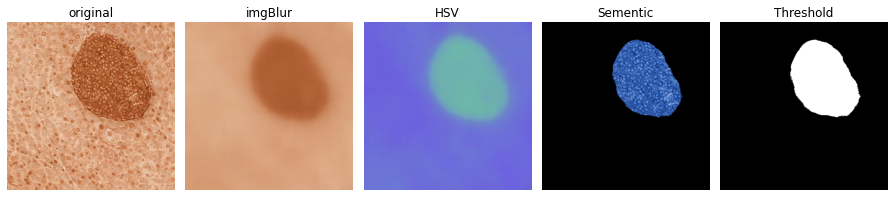

Test : 100%|██████████| 1/1 [00:00<00:00,  3.47it/s]


In [16]:
# 색상 범위 설정
lower=(100,170,150)
higher=(120,200,190)
cnt=0
for img_name in tqdm.tqdm(img_list[639:640], desc="Test "): # 142:158 or 251:275 or 522:534
    cnt+=1
    img=cv2.imread(img_name)

    # 이미지 정규화
    #img = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)

    # 블러처리
    imgcopy=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    imgBlur = cv2.medianBlur(img, 65)   
    imgBlur2 = cv2.cvtColor(imgBlur, cv2.COLOR_BGR2RGB)

    img_hsv = cv2.cvtColor(imgBlur2, cv2.COLOR_BGR2HSV)
    img_mask = cv2.inRange(img_hsv, lower, higher)
    img_result = cv2.bitwise_and(img, img, mask=img_mask)
    
    # kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (4,4))
    # dilate = cv2.dilate(img_result, kernel, anchor=(-1, -1), iterations=3)
    # dilate2 = cv2.dilate(dilate, kernel, anchor=(-1, -1), iterations=3)
    
    img_gray = cv2.cvtColor(img_result, cv2.COLOR_BGR2GRAY)
    ret, thr = cv2.threshold(img_gray, 20, 255, cv2.THRESH_BINARY) 
    
    titles = ['original','imgBlur','HSV','Sementic', 'Threshold']
    images = [imgcopy,imgBlur2,img_hsv ,img_result, thr]
    plt.figure(figsize=(15, 15))
    for i in range(len(titles)):
        plt.subplot(1, 6, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
        plt.tight_layout()

    plt.show()
    # cv2.imwrite(trash_target + '/%05d.jpg' % cnt, thr)


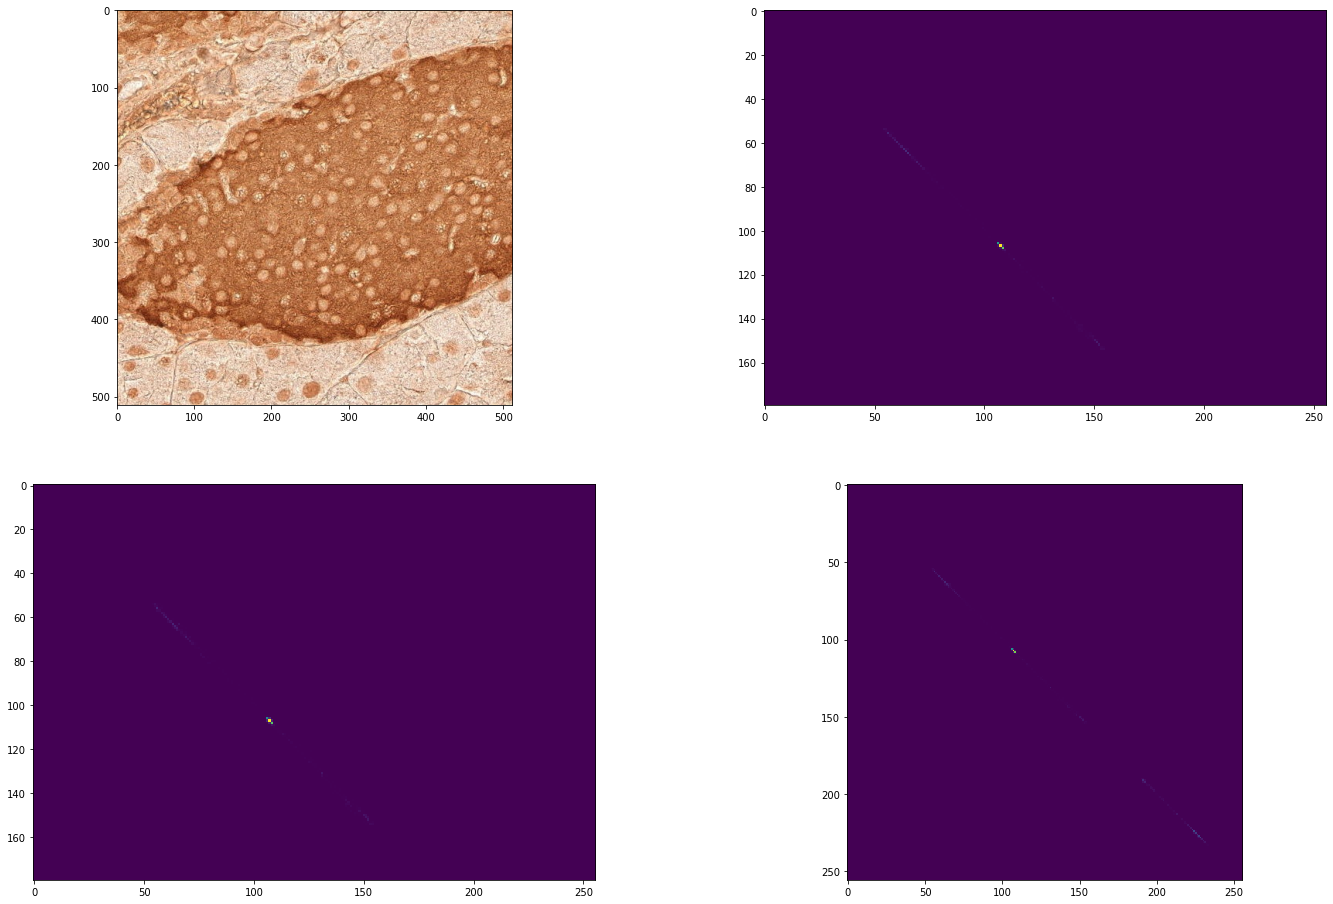

In [17]:
## GOOD
roi = cv2.imread(img_list[1549])
imgBlur = cv2.medianBlur(roi, 55)   
imgBlur2 = cv2.cvtColor(imgBlur, cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(imgBlur2,cv2.COLOR_BGR2HSV)

hist1 = cv2.calcHist( hsv, [0,1], None, [180, 256], [0, 180, 0, 256])
hist2 = cv2.calcHist( hsv, [0,2], None, [180, 256], [0, 180, 0, 256] )
hist3_GOOD = cv2.calcHist( hsv, [1,2], None, [256, 256], [0, 256, 0, 256] )

# cv2.normalize(hist1, hist1, 0, 255, cv2.NORM_MINMAX)
# cv2.normalize(hist2, hist2, 0, 255, cv2.NORM_MINMAX)
# cv2.normalize(hist3_GOOD, hist3_GOOD, 0, 255, cv2.NORM_MINMAX)

plt.figure(figsize=(24,16))
plt.subplot(221)
plt.imshow(roi[:,:,::-1])
plt.subplot(222)
plt.imshow(hist1,interpolation='nearest')   # x축 : S, y축 : H
plt.subplot(223)
plt.imshow(hist2,interpolation='nearest')   # x축 : V, y축 : H
plt.subplot(224)
plt.imshow(hist3_GOOD,interpolation='nearest')   # x축 : V, y축 : S
plt.show()

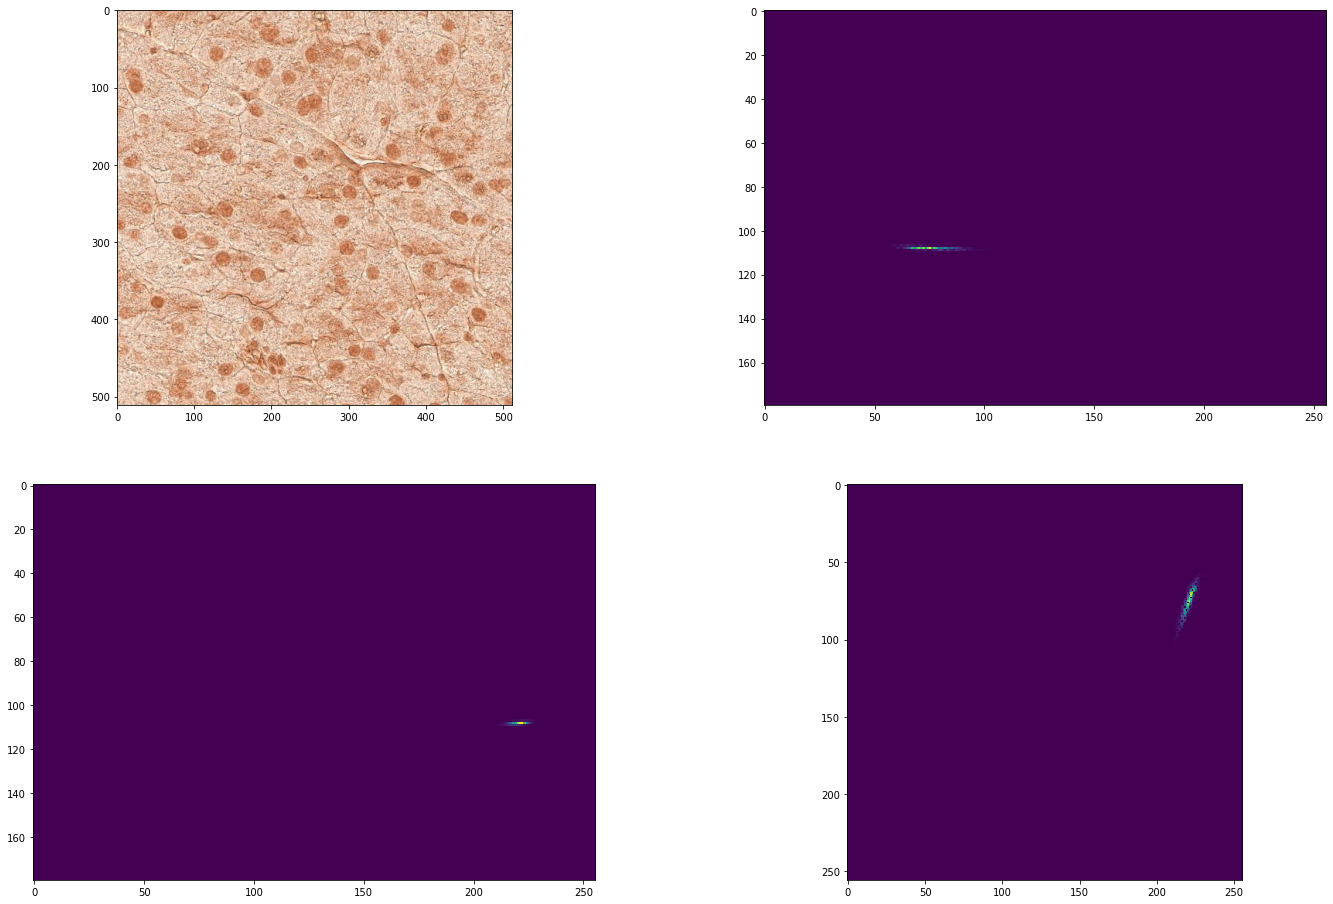

In [19]:
## Nomal
trash=img_list[966:967]
hsv=[]

for i in trash:
    roi = cv2.imread(i)
    imgBlur = cv2.medianBlur(roi, 55)   
    imgBlur2 = cv2.cvtColor(imgBlur, cv2.COLOR_BGR2RGB)
    hsv.append(cv2.cvtColor(imgBlur2,cv2.COLOR_BGR2HSV))

hist1 = cv2.calcHist( hsv, [0,1], None, [180, 256], [0, 180, 0, 256])
hist2 = cv2.calcHist( hsv, [0,2], None, [180, 256], [0, 180, 0, 256] )
hist3_Nomal = cv2.calcHist( hsv, [1,2], None, [256, 256], [0, 256, 0, 256] )
cv2.normalize(hist1, hist1, 0, 255, cv2.NORM_MINMAX)
cv2.normalize(hist2, hist2, 0, 255, cv2.NORM_MINMAX)
cv2.normalize(hist3_Nomal, hist3_Nomal, 0, 255, cv2.NORM_MINMAX)

plt.figure(figsize=(24,16))
plt.subplot(221)
plt.imshow(roi[:,:,::-1])
plt.subplot(222)
plt.imshow(hist1,interpolation='nearest')   # x축 : S, y축 : H
plt.subplot(223)
plt.imshow(hist2,interpolation='nearest')   # x축 : V, y축 : H
plt.subplot(224)
plt.imshow(hist3_Nomal,interpolation='nearest')   # x축 : V, y축 : S
plt.show()

In [26]:
def Labeling(img_list,target,low,high):
    # 색상 범위 설정
    flag=False
    lower=low
    higher=high
    cnt=0
    for img_name in tqdm.tqdm(img_list, desc="Test "): # 142:158 or 251:275 or 522:534
        cnt+=1
        img=cv2.imread(img_name)

        # 이미지 정규화
        #img = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)

        # 블러처리
        imgcopy=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        imgBlur = cv2.medianBlur(img, 55)   
        imgBlur2 = cv2.cvtColor(imgBlur, cv2.COLOR_BGR2RGB)

        img_hsv = cv2.cvtColor(imgBlur2, cv2.COLOR_BGR2HSV)
        img_mask = cv2.inRange(img_hsv, lower, higher)
        img_result = cv2.bitwise_and(img, img, mask=img_mask)
        
        # kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (4,4))
        # dilate = cv2.dilate(img_result, kernel, anchor=(-1, -1), iterations=3)
        # dilate2 = cv2.dilate(dilate, kernel, anchor=(-1, -1), iterations=3)
        
        img_gray = cv2.cvtColor(img_result, cv2.COLOR_BGR2GRAY)
        ret, thr = cv2.threshold(img_gray, 20, 255, cv2.THRESH_BINARY) 
        
        if flag:
            titles = ['blur','Sementic', 'Threshold']
            images = [img, img_result, thr]
            plt.figure(figsize=(15, 15))
            for i in range(len(titles)):
                plt.subplot(1, 6, i+1)
                plt.imshow(images[i], cmap='gray')
                plt.title(titles[i])
                plt.axis('off')
                plt.tight_layout()
            plt.show()
        else :
            cv2.imwrite(target + '/%05d.jpg' % cnt, thr)


In [34]:
workspace='D:/Codes/testing/Development-of-histologic-and-pathological-photographic-intellectualization-analysis-system/test'
dataset=os.path.join(workspace,'dataset')
sample_image_path=os.path.join(dataset,'Image_bad_good')
sample_num=['0552','0556','1624','2415','3904','3934','4116','5155','5303','5901']
range_list=[[140,186,155,202],[148,194,161,198],[114,204,143,223],[140,192,126,221],[129,201,150,211],[140,185,153,207],[140,217,100,209],[140,212,97,216],[135,159,186,208],[140,221,90,215]]

for num,rng in zip(sample_num,range_list):
    print(f'{num} 이미지')
    img_list=glob.glob(os.path.join(dataset,f'Image_crop/{num}_crop')+'/*.jpg')
    target=os.path.join(dataset,f'Image_labeling/{num}_labeling')
    Labeling(img_list,target,(100,rng[0],rng[2]),(120,rng[1],rng[3]))

0552 이미지


Test : 100%|██████████| 5183/5183 [02:57<00:00, 29.21it/s]


0556 이미지


Test : 100%|██████████| 1056/1056 [00:34<00:00, 30.97it/s]


1624 이미지


Test : 100%|██████████| 1188/1188 [00:41<00:00, 28.94it/s]


2415 이미지


Test : 100%|██████████| 1950/1950 [01:01<00:00, 31.56it/s]


3904 이미지


Test : 100%|██████████| 1720/1720 [00:55<00:00, 31.18it/s]


3934 이미지


Test : 100%|██████████| 6080/6080 [03:20<00:00, 30.32it/s]


4116 이미지


Test : 100%|██████████| 14450/14450 [09:25<00:00, 25.54it/s]


5155 이미지


Test : 100%|██████████| 5934/5934 [03:34<00:00, 27.68it/s]


5303 이미지


Test : 100%|██████████| 1368/1368 [00:48<00:00, 28.12it/s]


5901 이미지


Test : 100%|██████████| 19200/19200 [11:18<00:00, 28.29it/s]
